<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/17_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo $K$-means

In questo notebook si utilizza l'algoritmo $K$-means per clusterizzare un dataset contenente $m=30$ osservazioni e $n=2$ feature numeriche.

In [ ]:
# "Montiamo" il drive per poter accedere al file
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os

# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path_csv = os.path.join(folder_path, 'simple_dataset.csv')

# leggiamo il dataset
data = pd.read_csv(file_path_csv, header=0)

print(data)

     x     y
0   25  7900
1   34  5100
2   22  5300
3   27  7800
4   33  5900
5   33  7400
6   31  7300
7   22  5700
8   35  6900
9   34  7500
10  67  5100
11  54  3200
12  57  4000
13  43  4700
14  50  5300
15  57  3600
16  59  3500
17  52  5800
18  65  5900
19  47  5000
20  49  2500
21  48  2000
22  35  1400
23  33  1200
24  44  2000
25  45   500
26  38  2900
27  43  2700
28  51   800
29  46   700


In [ ]:
# Normalizzazione delle due feature
dataset_norm = data.copy()

dataset_norm['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())
dataset_norm['y'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())

print(dataset_norm)

           x         y
0   0.066667  1.000000
1   0.266667  0.621622
2   0.000000  0.648649
3   0.111111  0.986486
4   0.244444  0.729730
5   0.244444  0.932432
6   0.200000  0.918919
7   0.000000  0.702703
8   0.288889  0.864865
9   0.266667  0.945946
10  1.000000  0.621622
11  0.711111  0.364865
12  0.777778  0.472973
13  0.466667  0.567568
14  0.622222  0.648649
15  0.777778  0.418919
16  0.822222  0.405405
17  0.666667  0.716216
18  0.955556  0.729730
19  0.555556  0.608108
20  0.600000  0.270270
21  0.577778  0.202703
22  0.288889  0.121622
23  0.244444  0.094595
24  0.488889  0.202703
25  0.511111  0.000000
26  0.355556  0.324324
27  0.466667  0.297297
28  0.644444  0.040541
29  0.533333  0.027027


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

K = 4   # Numero di cluster

# Creazione del modello
kmeans_model = KMeans(n_clusters=K)
kmeans_model.fit(dataset_norm) # addestramento del modello

# Visualizzazione dei risultati
print("I centroidi sono: \n", kmeans_model.cluster_centers_, "\n")
centers = np.array(kmeans_model.cluster_centers_)
print("WCSS: \n", kmeans_model.inertia_, "\n")
print("I cluster assegnati alle osservazioni sono: \n", kmeans_model.labels_)

I centroidi sono: 
 [[0.40740741 0.21846847]
 [0.16888889 0.83513514]
 [0.73555556 0.55540541]
 [0.56666667 0.06756757]] 

WCSS: 
 0.8854524915305695 

I cluster assegnati alle osservazioni sono: 
 [1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 3 0 0 0 3 0 0 3 3]


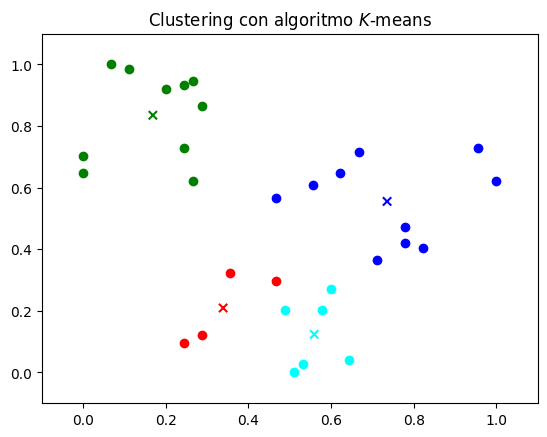

In [ ]:
import matplotlib.pyplot as plt

colors = ['blue', 'green', 'red', 'cyan']
plt.xlim([-0.1, max(dataset_norm.x)+0.1])
plt.ylim([-0.1, max(dataset_norm.y)+0.1])
plt.title('Clustering con algoritmo $K$-means')

for i in range(len(dataset_norm.x)):
    plt.plot(dataset_norm.x[i], dataset_norm.y[i], color=colors[kmeans_model.labels_[i]], marker='o')

plt.scatter(centers[:, 0], centers[:, 1], marker="x", color=colors)
plt.show()